In [1]:
import os
import torch
import torchvision

import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn

from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
# Gloval vars

seed = 127
train_path = 'data/train'
train_batchsize = 64

# Data first look

In [2]:
# get labels

labels_list = []
train_imgs = os.listdir('data/train')

for f in train_imgs:
    
    # 0 for 'cat', 1 for 'dog'
    if f.split('.')[0] == 'cat':
        labels_list.append(0)

    elif f.split('.')[0] == 'dog':
        labels_list.append(1)

    else:
    # if no label 
        labels_list.append(-1)

print(f'Images count = {len(train_imgs)}\nLabels count = {len(labels_list)}')

Images count = 25000
Labels count = 25000


In [3]:
df_train = pd.DataFrame(columns= ['image', 'label'])
df_train['image'] = train_imgs
df_train['label'] = labels_list

df_train.head(3)

,image,label
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0


In [4]:
df_train['label'].unique()

array([0, 1], dtype=int64)

<Figure size 864x864 with 0 Axes>

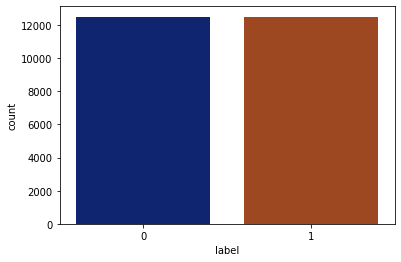

<Figure size 864x864 with 0 Axes>

In [38]:
sns.countplot(data= df_train, x= 'label', palette= 'dark')
plt.figure(figsize=(12,12))

In [47]:
shape_arr = []

for i in range(0, df_train.shape[0]):
    img_path = os.path.join(train_path, df_train['image'][i])

    with Image.open(img_path) as img:
        width, height = img.size
        shape_arr.append((width, height))

np.unique(shape_arr, axis= 0).__len__()

8513

In [77]:
np.max(shape_arr, axis= 0)

array([1050,  768])

In [78]:
np.min(shape_arr, axis= 0)

array([42, 32])

### *NOTE*: 8513 unique shapes of images, so reshape need.

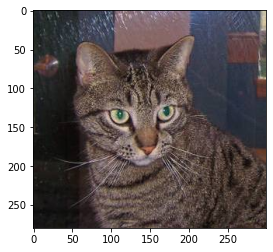

In [58]:
img_path = os.path.join(train_path, df_train['image'][1])

with Image.open(img_path) as img:
    plt.imshow(img)

# Mean and std to reshape and normalize

## Mean (channels)

In [59]:
r_mean_arr = []
g_mean_arr = []
b_mean_arr = []

for i in range(0, df_train.shape[0]):
    img_path = os.path.join(train_path, df_train['image'][i])
    
    with Image.open(img_path) as img:
        img_np = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)

        r_mean, g_mean, b_mean = np.mean(img_np, axis= (0,1))

        r_mean_arr.append(r_mean)
        g_mean_arr.append(g_mean)
        b_mean_arr.append(b_mean)


172.37118055555555

In [70]:
R_MEAN = np.mean(r_mean_arr) / 255
G_MEAN = np.mean(g_mean_arr) / 255
B_MEAN = np.mean(b_mean_arr) / 255

In [72]:
print(f"Red ch mean   = {R_MEAN}\nGreen ch mean = {G_MEAN}\nBlue ch mean  = {B_MEAN}")

Red ch mean   = 0.48832284218884975
Green ch mean = 0.45508163042054794
Blue ch mean  = 0.4169560571643627


## Std (channels)

In [73]:
r_std_arr = []
g_std_arr = []
b_std_arr = []

for i in range(0, df_train.shape[0]):
    img_path = os.path.join(train_path, df_train['image'][i])
    
    with Image.open(img_path) as img:
        img_np = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)

        r_std, g_std, b_std = np.std(img_np, axis= (0,1))

        r_std_arr.append(r_std)
        g_std_arr.append(g_std)
        b_std_arr.append(b_std)


In [74]:
R_STD = np.mean(r_std_arr) / 255
G_STD = np.mean(g_std_arr) / 255
B_STD = np.mean(b_std_arr) / 255

In [75]:
print(f"Red ch std   = {R_STD}\nGreen ch std = {G_STD}\nBlue ch std  = {B_STD}")

Red ch std   = 0.22944326551560382
Green ch std = 0.22498400642892036
Blue ch std  = 0.22518627654899104


# Train/test split and samples visual

In [14]:

X_train, X_test, y_train, y_test = train_test_split(df_train['image'], df_train['label'], test_size= 0.15, random_state= seed, stratify= df_train['label'])

print(f'Train size = {X_train.shape[0]}\nTest size = {X_test.shape[0]}')

Train size = 21250
Test size = 3750


<AxesSubplot:xlabel='label', ylabel='count'>

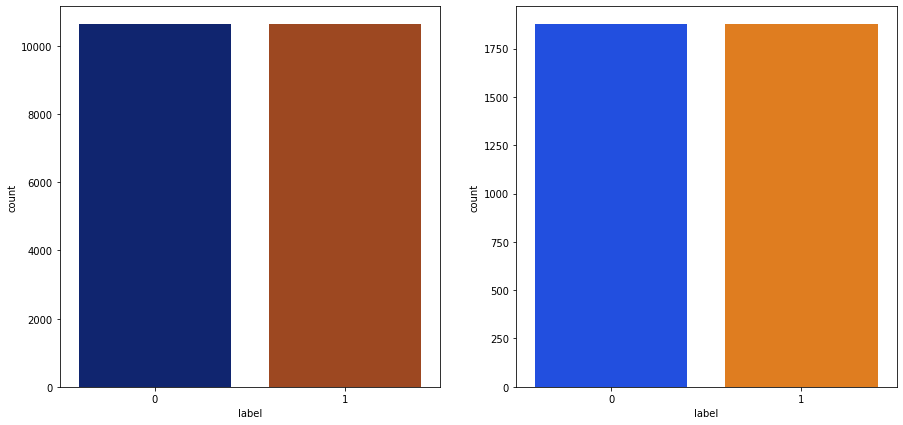

In [35]:
# stratified check

fig, axs = plt.subplots(1,2, figsize= (15,7))

sns.countplot(x= y_train, ax= axs[0], palette= 'dark')
sns.countplot(x= y_test, ax= axs[1], palette= 'bright')

# Transforms

In [79]:
train_transforms = torchvision.transforms.Compose(
    [torchvision.transforms.Resize(32), 
    torchvision.transforms.CenterCrop(31),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize([R_MEAN, G_MEAN, B_MEAN], [R_STD, G_STD, B_STD])])

# Implementing self-made CNN model

In [83]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        # layer1
        self.cv1 = nn.Conv2d(in_channels= 3, out_channels= 10, kernel_size= 3)
        self.batch_norm1 = nn.BatchNorm2d(num_features= 10)
        self.relu1 = nn.ReLU()

        # layer2
        self.cv2 = nn.Conv2d(in_channels= 10, out_channels= 15, kernel_size= 3)
        self.batch_norm2 = nn.BatchNorm2d(num_features= 15)
        self.relu2 = nn.ReLU()


        # layer3
        self.cv3 = nn.Conv2d(in_channels= 15, out_channels= 20, kernel_size= 3)
        self.batch_norm3 = nn.BatchNorm2d(num_features= 20)
        self.relu3 = nn.ReLU()

        # fc1
        self.fc1 = nn.Linear(13520, 1000)
        self.relu_fc1 = nn.ReLU()

        # fc1
        self.fc2 = nn.Linear(1000, 500)
        self.relu_fc2 = nn.ReLU()

        # fc1
        self.fc3 = nn.Linear(500,2)
        self.softmax = nn.Softmax(dim= 1)


    def forward(self, x):
        # l1
        x = self.relu1(self.batch_norm1(self.cv1(x)))

        # l2
        x = self.relu2(self.batch_norm2(self.cv2(x)))

        # l3
        x = self.relu3(self.batch_norm3(self.cv3(x)))

        x = x.view(-1, self._to_linear)

        # fc 1,2,3
        x = self.relu_fc1(self.fc1(x))
        x = self.relu_fc2(self.fc2(x))
        x = self.softmax(self.fc3(x))

net = ConvNet()
print(net)
        



ConvNet(
  (cv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (cv2): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm2): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (cv3): Conv2d(15, 20, kernel_size=(3, 3), stride=(1, 1))
  (batch_norm3): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc1): Linear(in_features=13520, out_features=1000, bias=True)
  (relu_fc1): ReLU()
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (relu_fc2): ReLU()
  (fc3): Linear(in_features=500, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


In [84]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.NLLLoss()

In [ ]:
import tqdm


EPOCHS = 30

for epoch in range(EPOCHS):
    for i in tqdm()
        
        

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")